Miggiano Davide - 4840761

Morando Andrea - 4604844

# Reddit's Hyperlinks network

This notebook contains a social network analysis mainly executed with the library of NetworkX.
The network is related to the Reddit's Hyperlinks network, which is a directed graph where nodes are subreddits and edges are hyperlinks between them. The dataset is available at this link: https://snap.stanford.edu/data/soc-RedditHyperlinks.html

The dataset is composed of two files: `soc-redditHyperlinks-title.tsv` and `soc-redditHyperlinks-body.tsv`. The first file contains the hyperlinks between the subreddits, while the second file contains the hyperlinks between the posts. The two files have the same structure, with the following columns:
- `SOURCE_SUBREDDIT`: the source subreddit of the hyperlink
- `TARGET_SUBREDDIT`: the target subreddit of the hyperlink
- `POST_ID`: the ID of the post
- `TIMESTAMP`: the timestamp of the post
- `LINK_SENTIMENT`: the sentiment of the hyperlink, which can be `1` (positive), `-1` (negative), or `0` (neutral)

The goal of this analysis is to understand the structure of the network and to identify the most important subreddits in terms of centrality and influence.

# Libraries

The libraries used in this notebook are:
- `pandas` for data manipulation
- `networkx` for network analysis
- `matplotlib` and `seaborn` for data visualization

# Data Preparation

The first steps of the analysis are related to the data preparation. We load the dataset and create the directed graph using the NetworkX library. We also compute some basic statistics of the network, such as the number of nodes and edges.

# Network Analysis

The network analysis is divided into several parts:
1. **Basic Network Statistics**: we compute the number of nodes, edges, and the density of the network.
2. **Degree Distribution**: we analyze the degree distribution of the network and plot the degree distribution histogram.
3. **Centrality Measures**: we compute the degree centrality, closeness centrality, and betweenness centrality of the nodes in the network.
4. **Influence Measures**: we compute the PageRank and HITS scores of the nodes in the network.
5. **Community Detection**: we detect communities in the network using the Louvain method.
6. **Visualization**: we visualize the network using the Fruchterman-Reingold layout.

# Results

The results of the analysis are presented in the form of tables and plots, which provide insights into the structure of the Reddit's Hyperlinks network and the most important subreddits in terms of centrality and influence.

# Conclusions

The analysis of the Reddit's Hyperlinks network has shown that the network is sparse and has a power-law degree distribution. The centrality and influence measures have identified the most important subreddits in the network, which are related to popular topics such as news, politics, and entertainment. The community detection has revealed the presence of distinct communities in the network, which are related to different topics and interests.

# References

- [NetworkX Documentation](https://networkx.org/documentation/stable/index.html)
- [Stanford SNAP: Reddit Hyperlinks Network](https://snap.stanford.edu/data/soc-RedditHyperlinks.html)
- [Louvin Community Detection](https://python-louvain.readthedocs.io/en/latest/)
- [Fruchterman-Reingold Layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.fruchterman_reingold_layout.html)
- [Power Law Degree Distribution](https://en.wikipedia.org/wiki/Power_law)




In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import modularity
from tabulate import tabulate

# Import the graph

In [2]:
tsv_file_path = "soc-redditHyperlinks-body.tsv"

G = nx.DiGraph()

# Read the TSV file and add nodes and edges to the graph
with open(tsv_file_path, 'r') as file:
    # Skip the header line
    next(file)
    for line in file:
        # Split the line by tab
        data = line.strip().split('\t')
        if len(data) == 6:
            source_subreddit, target_subreddit, _, _, _, _ = data
            # Add source and target nodes to the graph if they don't exist
            if source_subreddit not in G:
                G.add_node(source_subreddit)
            if target_subreddit not in G:
                G.add_node(target_subreddit)
            # Add directed edge from source to target
            G.add_edge(source_subreddit, target_subreddit)

# Compute some basic measurment of the network

In [3]:
# Number of Nodes and Edges
print("Number of Nodes: ", G.number_of_nodes())
print("Number of Edges: ", G.number_of_edges())

# Number of Strongly Connected Components
print("Number of Strongly Connected Components: ", nx.number_strongly_connected_components(G))

# Number of Weakly Connected Components
print("Number of Weakly Connected Components: ", nx.number_weakly_connected_components(G))

# Average Node Degree
average_node_degree = np.mean([d for n, d in G.degree()])
print("Average Node Degree: ", average_node_degree)

# Average in-degree
average_in_degree = np.mean([d for n, d in G.in_degree()])
print("Average In-Degree: ", average_in_degree)

# Average out-degree
average_out_degree = np.mean([d for n, d in G.out_degree()])
print("Average Out-Degree: ", average_out_degree)

# Compute the density of the Graph
print("Density of the Graph: ", nx.density(G))

Number of Nodes:  35776
Number of Edges:  137821
Number of Strongly Connected Components:  24071
Number of Weakly Connected Components:  497
Average Node Degree:  7.704662343470483
Average In-Degree:  3.8523311717352415
Average Out-Degree:  3.8523311717352415
Density of the Graph:  0.00010768221304640787


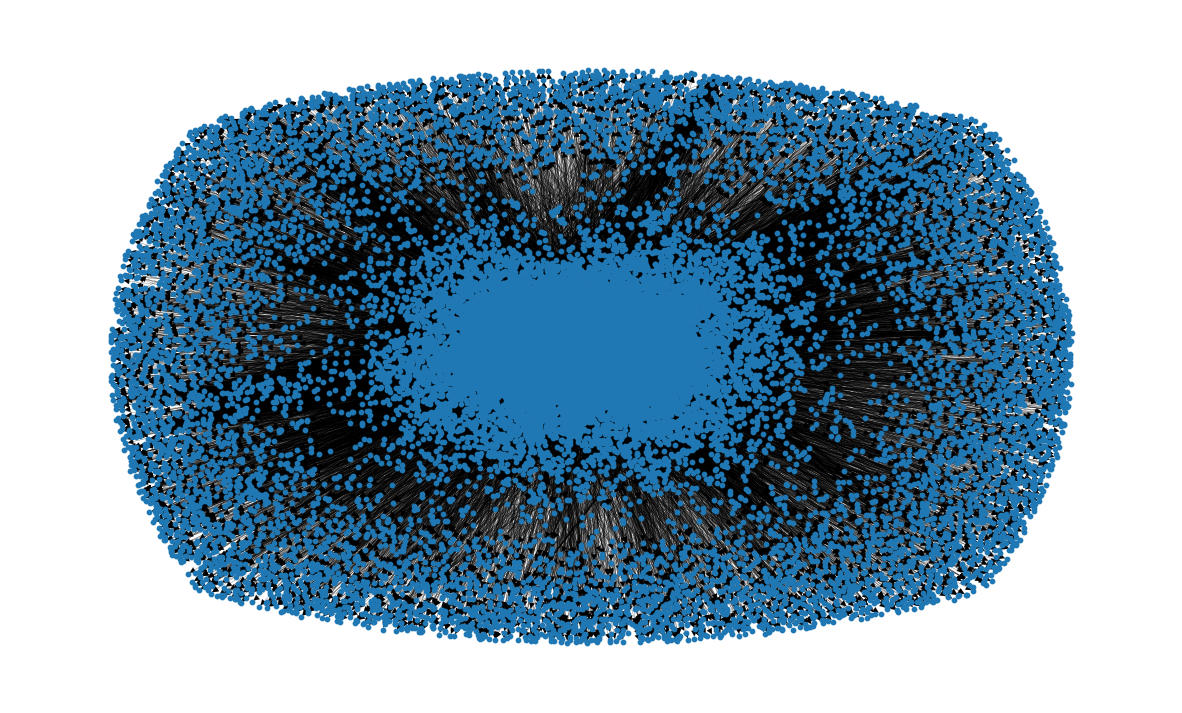

In [4]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

# SCC and IN and OUT Components

In [5]:
# Step 2: Find all strongly connected components (SCCs)
sccs = list(nx.strongly_connected_components(G))
largest_scc = max(sccs, key=len)
largest_scc_subgraph = G.subgraph(largest_scc)

# Step 3: Compute IN and OUT components
in_component = set()
out_component = set()

for node in G:
    if node not in largest_scc:
        if any(nx.has_path(G, node, scc_node) for scc_node in largest_scc):
            in_component.add(node)
        if any(nx.has_path(G, scc_node, node) for scc_node in largest_scc):
            out_component.add(node)

disconnected_nodes = set(G.nodes()) - largest_scc - in_component - out_component

In [6]:
print(f"Disconnected {len(disconnected_nodes)}")
print(f"In {len(in_component)}")
print(f"Out {len(out_component)}")
print(f"SCC {largest_scc_subgraph.number_of_nodes()}")
print(f"Total {len(disconnected_nodes) + len(in_component) + len(out_component) + largest_scc_subgraph.number_of_nodes()}")

Disconnected 2537
In 14412
Out 7263
SCC 11564
Total 35776


# Reduce to strongly connected component

In [7]:
# Extract the giant component of the Graph
giant_component = max(nx.strongly_connected_components(G), key=len)
G_giant = G.subgraph(giant_component)

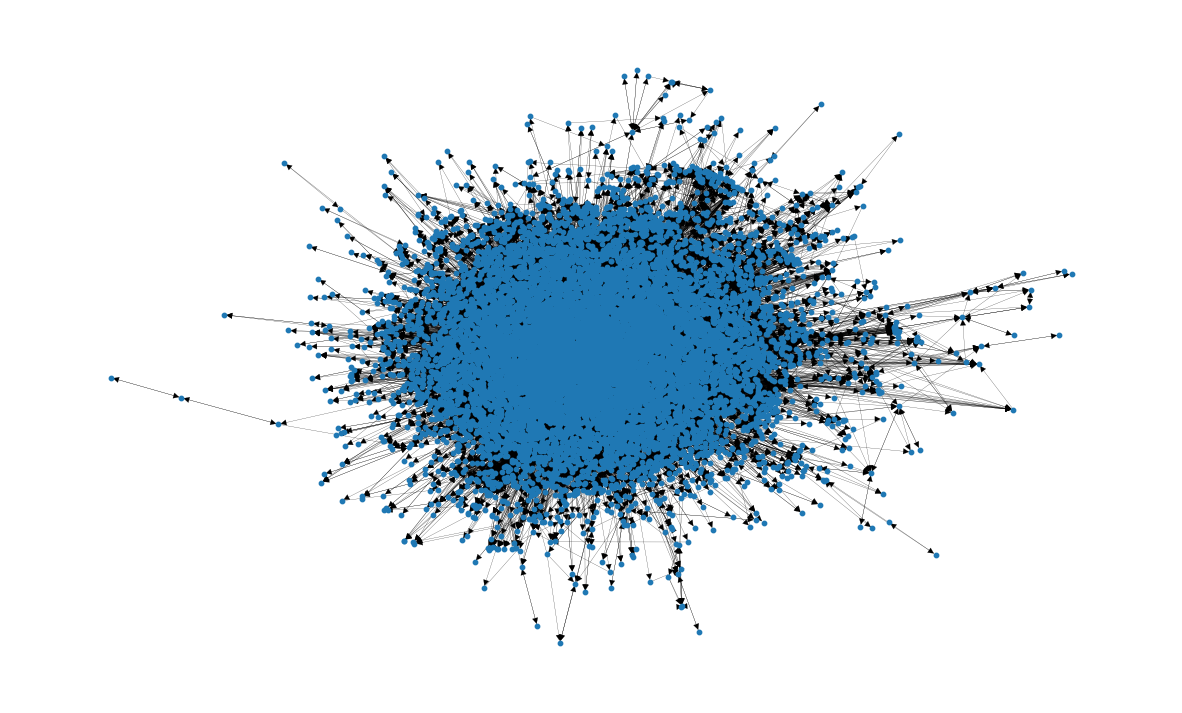

In [8]:
pos = nx.spring_layout(G_giant, iterations=15, seed=1722)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G_giant, pos=pos, ax=ax, **plot_options)

In [9]:
# Number of Nodes and Edges
print("Number of Nodes: ", G_giant.number_of_nodes())
print("Number of Edges: ", G_giant.number_of_edges())

# Number of Strongly Connected Components
print("Number of Strongly Connected Components: ", nx.number_strongly_connected_components(G_giant))

# Number of Weakly Connected Components
print("Number of Weakly Connected Components: ", nx.number_weakly_connected_components(G_giant))

# Average Node Degree
average_node_degree = np.mean([d for n, d in G_giant.degree()])
print("Average Node Degree: ", average_node_degree)

# Average in-degree
average_in_degree = np.mean([d for n, d in G_giant.in_degree()])
print("Average In-Degree: ", average_in_degree)

# Average out-degree
average_out_degree = np.mean([d for n, d in G_giant.out_degree()])
print("Average Out-Degree: ", average_out_degree)

# Compute the density of the Graph
print("Density of the Graph: ", nx.density(G_giant))

Number of Nodes:  11564
Number of Edges:  98166
Number of Strongly Connected Components:  1
Number of Weakly Connected Components:  1
Average Node Degree:  16.977862331373228
Average In-Degree:  8.488931165686614
Average Out-Degree:  8.488931165686614
Density of the Graph:  0.0007341460836881963


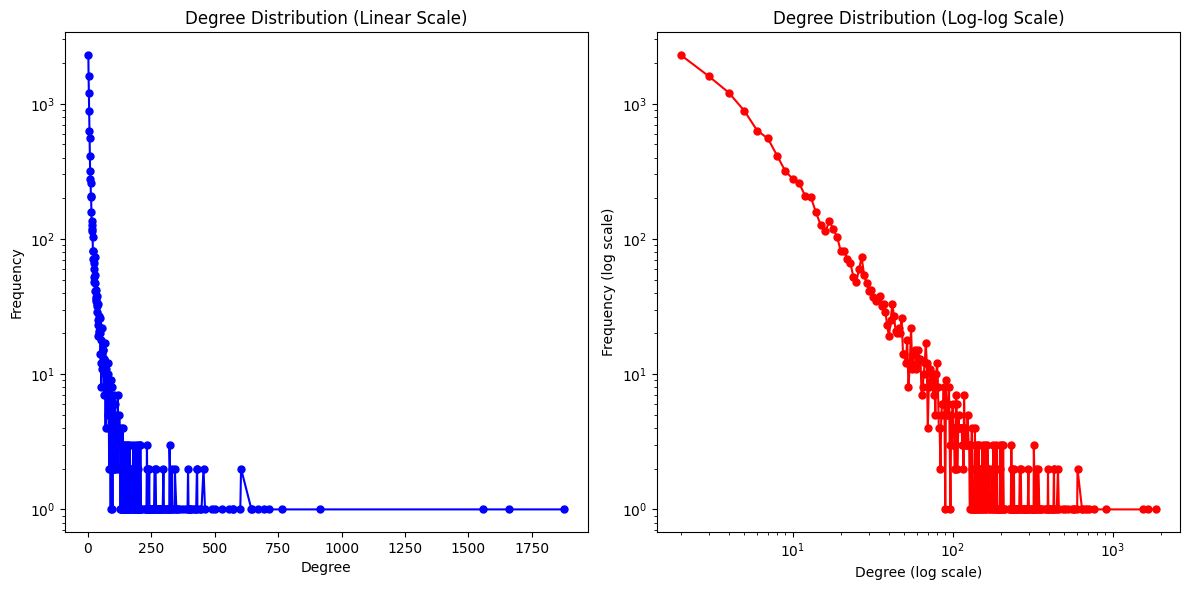

In [10]:
# Your degree sequence and degree count calculation
degree_sequence = sorted([d for n, d in G_giant.degree()], reverse=True)
degreeCount = {}
for degree in degree_sequence:
    if degree in degreeCount:
        degreeCount[degree] += 1
    else:
        degreeCount[degree] = 1
degrees, counts = zip(*degreeCount.items())

# Plotting the degree distribution (linear scale)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(degrees, counts, 'bo-', markersize=5)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Linear Scale)')

# Plotting the degree distribution (log-log scale)
plt.subplot(1, 2, 2)
plt.loglog(degrees, counts, 'ro-', markersize=5)
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution (Log-log Scale)')

plt.tight_layout()
plt.show()

# Reduce based on page ranking

In [11]:
def reduce_graph(graph, perc_to_keep):
    # Calculate PageRank
    pagerank = nx.pagerank(graph)

    # Sort nodes by combined score
    sorted_nodes = sorted(pagerank, key=pagerank.get, reverse=True)

    # Select a fraction of nodes to keep (e.g., top 50%)
    num_nodes_to_keep = int(len(sorted_nodes) * perc_to_keep)
    nodes_to_keep = sorted_nodes[:num_nodes_to_keep]

    # Create a new graph with only selected nodes
    reduced_graph = graph.subgraph(nodes_to_keep)

    return reduced_graph

In [12]:
G_small = reduce_graph(G_giant, 0.4)

## Basic network measurments

In [13]:
# Number of Nodes and Edges
print("Number of Nodes: ", G_small.number_of_nodes())
print("Number of Edges: ", G_small.number_of_edges())

# Number of Strongly Connected Components
print("Number of Strongly Connected Components: ", nx.number_strongly_connected_components(G_small))

# Number of Weakly Connected Components
print("Number of Weakly Connected Components: ", nx.number_weakly_connected_components(G_small))

# Average Node Degree
average_node_degree = np.mean([d for n, d in G_small.degree()])
print("Average Node Degree: ", average_node_degree)

# Average in-degree
average_in_degree = np.mean([d for n, d in G_small.in_degree()])
print("Average In-Degree: ", average_in_degree)

# Average out-degree
average_out_degree = np.mean([d for n, d in G_small.out_degree()])
print("Average Out-Degree: ", average_out_degree)

# Compute the density of the Graph
print("Density of the Graph: ", nx.density(G_small))

Number of Nodes:  4625
Number of Edges:  66136
Number of Strongly Connected Components:  20
Number of Weakly Connected Components:  3
Average Node Degree:  28.599351351351352
Average In-Degree:  14.299675675675676
Average Out-Degree:  14.299675675675676
Density of the Graph:  0.003092490414289722


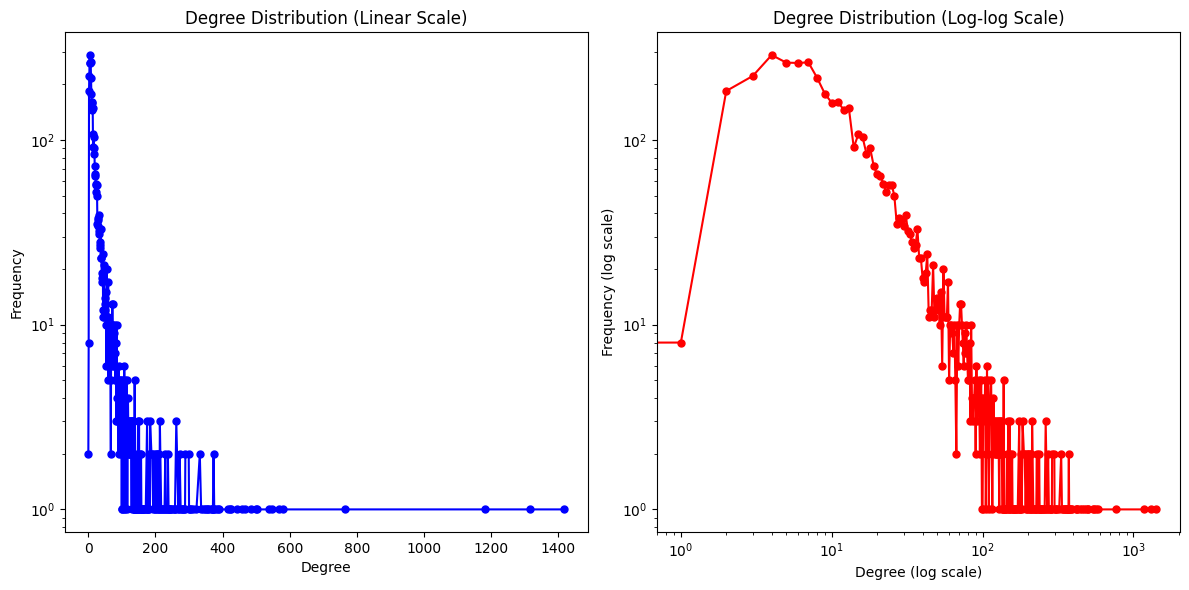

In [14]:
# Degree distribution
# Your degree sequence and degree count calculation
degree_sequence = sorted([d for n, d in G_small.degree()], reverse=True)
degreeCount = {}
for degree in degree_sequence:
    if degree in degreeCount:
        degreeCount[degree] += 1
    else:
        degreeCount[degree] = 1
degrees, counts = zip(*degreeCount.items())

# Plotting the degree distribution (linear scale)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(degrees, counts, 'bo-', markersize=5)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Linear Scale)')

# Plotting the degree distribution (log-log scale)
plt.subplot(1, 2, 2)
plt.loglog(degrees, counts, 'ro-', markersize=5)
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution (Log-log Scale)')

plt.tight_layout()
plt.show()


## Graph visualization

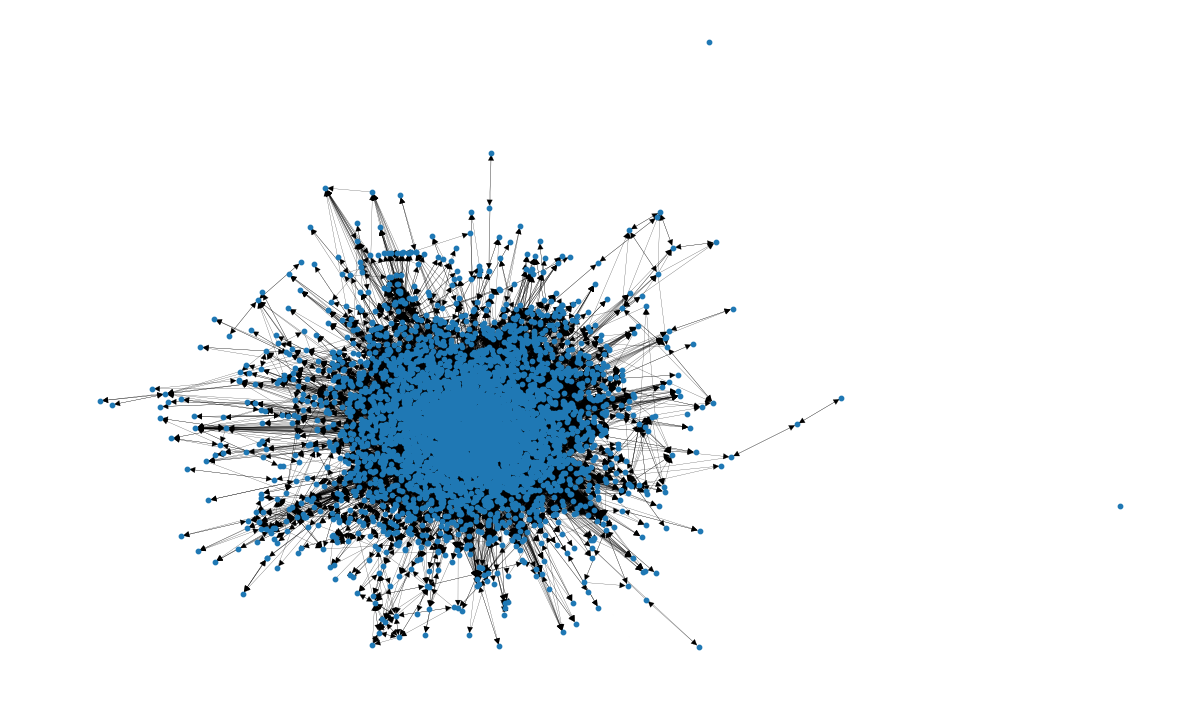

In [15]:
pos = nx.spring_layout(G_small, iterations=15, seed=1722)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G_small, pos=pos, ax=ax, **plot_options)

## Graph visualization with degree 

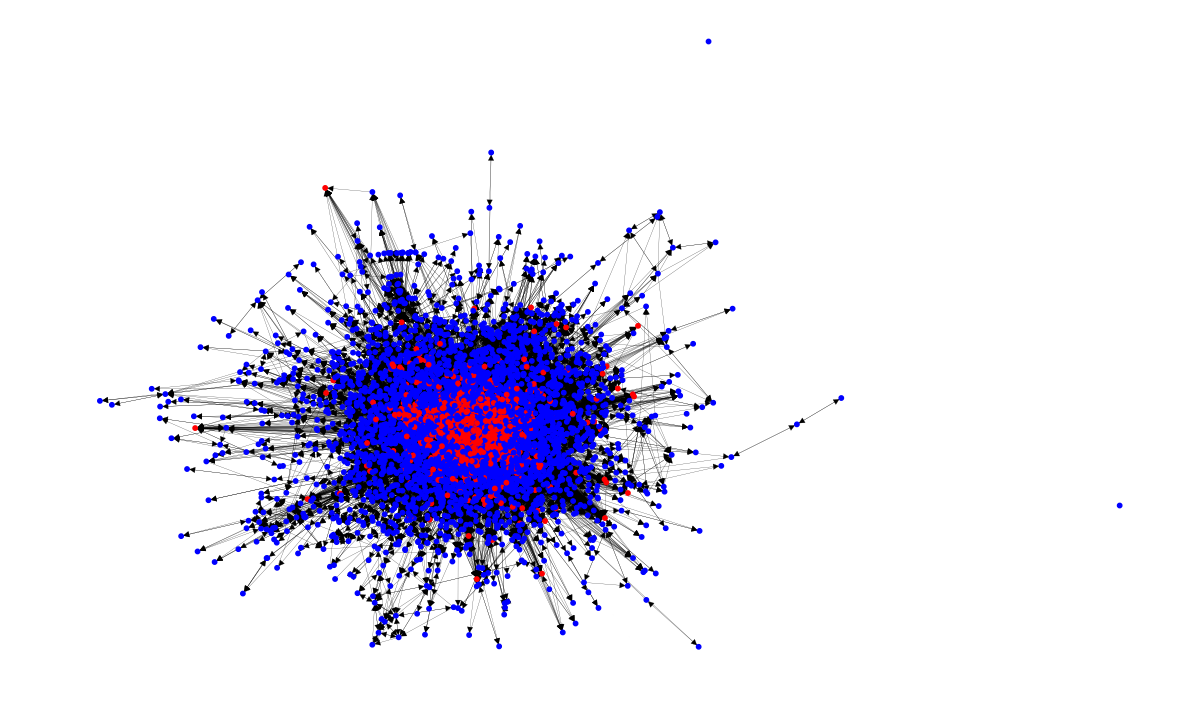

In [16]:
# Change color of nodes with degree higher than average
degree_colors = ["red" if G_small.in_degree(node) > average_in_degree else "blue" for node in G_small.nodes()]

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options["node_color"] = degree_colors

nx.draw_networkx(G_small, pos=pos, ax=ax, **plot_options)

## Diameter of the graph

In [17]:
# The Diamater is computable only if the Graph is Weakly Connected, Strongly Connected or Semi Connected
diameter = 'The Graph is Not Connected so the Diameter is not computable'

if nx.is_strongly_connected(G_small):
    print("The Graph is Strongly Connected")
    diameter = nx.diameter(G_small)
elif nx.is_weakly_connected(G_small):
    print("The Graph is Weakly Connected")
    diameter = "infinite"
elif nx.is_semiconnected(G_small):
    print("The Graph is Semi Connected")
    diameter = "infinite"
else:
    print("The Graph is Not Connected")

# Print the Diamater of the Graph
print("Diameter of the Graph: ", diameter)

The Graph is Not Connected
Diameter of the Graph:  The Graph is Not Connected so the Diameter is not computable


## Density of the graph

In [18]:
# Compute the density of the Graph
density = nx.density(G_small)
print("Density of the Graph: ", density)

Density of the Graph:  0.003092490414289722


## Betweenness centrality

In [19]:
# Compute and plot the betweenness centrality of the Graph
betweenness_centrality = nx.betweenness_centrality(G_small)

# Sort nodes by betweenness centrality in descending order and take the first 15
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:15]

# Print the betweenness centrality of the top 15 nodes
print("Top 15 nodes by Betweenness Centrality:")
for node in sorted_betweenness:
    print(f"{node[0]} - {node[1]}")

Top 15 nodes by Betweenness Centrality:
iama - 0.13724700108040153
askreddit - 0.13645616046733458
subredditdrama - 0.10317006292792842
outoftheloop - 0.06999266231473131
gaming - 0.03613322094067884
leagueoflegends - 0.03287782887532701
writingprompts - 0.032835810876778206
legaladvice - 0.03031207170493832
explainlikeimfive - 0.022198181308022872
techsupport - 0.02115512089779796
conspiracy - 0.019821071614781253
games - 0.01612619162743361
dogecoin - 0.01587861906162409
clashofclans - 0.014821604307899772
buildapc - 0.014696482046063164


## Closeness centrality

In [20]:
# Compute and plot the closeness centrality of the Graph
closeness_centrality = nx.closeness_centrality(G_small)

# Sort nodes by closeness centrality in descending order and take the first 15
sorted_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:15]

# Print the betweenness centrality of the top 15 nodes
print("Top 15 nodes by Closeness Centrality:")
for node in sorted_closeness:
    print(f"{node[0]} - {node[1]}")

Top 15 nodes by Closeness Centrality:
askreddit - 0.5101591061232225
iama - 0.49432921731777263
videos - 0.4579699509369452
pics - 0.4510398189057799
funny - 0.43857991883917824
gaming - 0.4375000819177939
outoftheloop - 0.43396589001051133
worldnews - 0.43246287232536773
technology - 0.4302477989431834
news - 0.4258850354951976
explainlikeimfive - 0.4245934073202741
pcmasterrace - 0.4242425036778607
dataisbeautiful - 0.41863001676802314
science - 0.41764607349953925
leagueoflegends - 0.41651648621095416


## Clustering coefficient

In [21]:
# Compute the transitivity of the Graph
print("Transitivity of the Graph: ", nx.transitivity(G_small))

# Compute the total number of triangles
triangle_count = sum(nx.triangles(G_small.to_undirected(), nodes=G.nodes()).values()) // 3
print("Triangle estimation: " + str(triangle_count))

# Compute the global clustering coefficient of the Graph
print("Global Clustering Coefficient of the Graph: ", nx.average_clustering(G_small))

Transitivity of the Graph:  0.09115411244778346
Triangle estimation: 307884
Global Clustering Coefficient of the Graph:  0.30117198095042197


## Plot clustering coefficient

Global Clustering Coefficient of the Graph:  0.30117198095042197


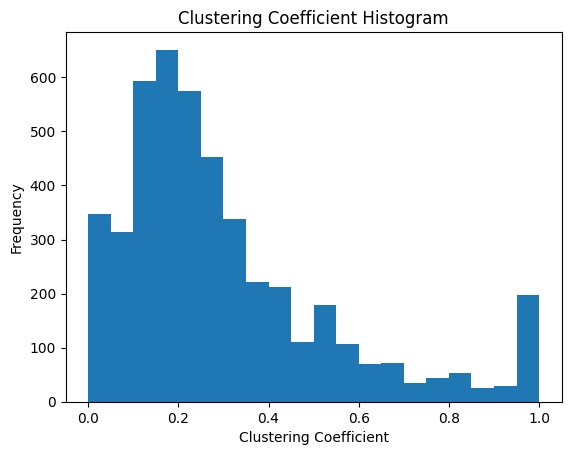

In [22]:
# Compute the global clustering coefficient of the Graph
print("Global Clustering Coefficient of the Graph: ", nx.average_clustering(G_small))

# Compute and Plot the clustering coefficient of the Graph into a histogram
plt.hist(list(nx.clustering(G_small).values()), bins=20)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Histogram')
plt.show()

## Hubs and authorities

In [23]:
# Plot the graph with hubs and authorities
hubs, authorities = nx.hits(G_small)

hubs_list = sorted(hubs.items(), key=lambda x: x[1], reverse=True)
auth_list = sorted(authorities.items(), key=lambda x: x[1], reverse=True)

print("Top 15 hubs:")
for item in hubs_list[:15]:
    print(f"{item[0]} {item[1]:.5f}")

Top 15 hubs:
subredditdrama 0.00740
copypasta 0.00497
outoftheloop 0.00483
circlebroke 0.00476
circlejerkcopypasta 0.00461
drama 0.00449
shitliberalssay 0.00437
conspiracy 0.00418
justunsubbed 0.00411
hailcorporate 0.00408
self 0.00402
askreddit 0.00393
nostupidquestions 0.00387
bestofoutrageculture 0.00363
karmacourt 0.00345


In [24]:
print("\nTop 15 authorities:")
for item in auth_list[:15]:
    print(f"{item[0]} {item[1]:.5f}")


Top 15 authorities:
askreddit 0.00960
iama 0.00845
pics 0.00656
videos 0.00652
worldnews 0.00577
funny 0.00560
news 0.00534
explainlikeimfive 0.00464
gaming 0.00459
technology 0.00442
outoftheloop 0.00440
science 0.00433
showerthoughts 0.00403
gifs 0.00392
tifu 0.00387


## Page ranking

In [25]:
pagerank = nx.pagerank(G_small)

sorted_pagerank = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)

# Print the sorted PageRank values
print("Top 15 PageRank:")
for node, rank in sorted_pagerank[:15]:
    print(f"{node}: {rank:.4f}")

Top 15 PageRank:
iama: 0.0148
askreddit: 0.0143
videos: 0.0076
pics: 0.0076
videos_discussion: 0.0065
outoftheloop: 0.0058
gaming: 0.0052
funny: 0.0044
worldnews: 0.0043
explainlikeimfive: 0.0039
news: 0.0038
pcmasterrace: 0.0038
technology: 0.0037
leagueoflegends: 0.0036
movies: 0.0034


In [26]:
nx.degree_pearson_correlation_coefficient(G_small)

-0.08638676859852788

# Graph from direct to undirected

In [27]:
# Transform the graph from directed to undirected
G_small_undirected = G_small.to_undirected()

## Communities

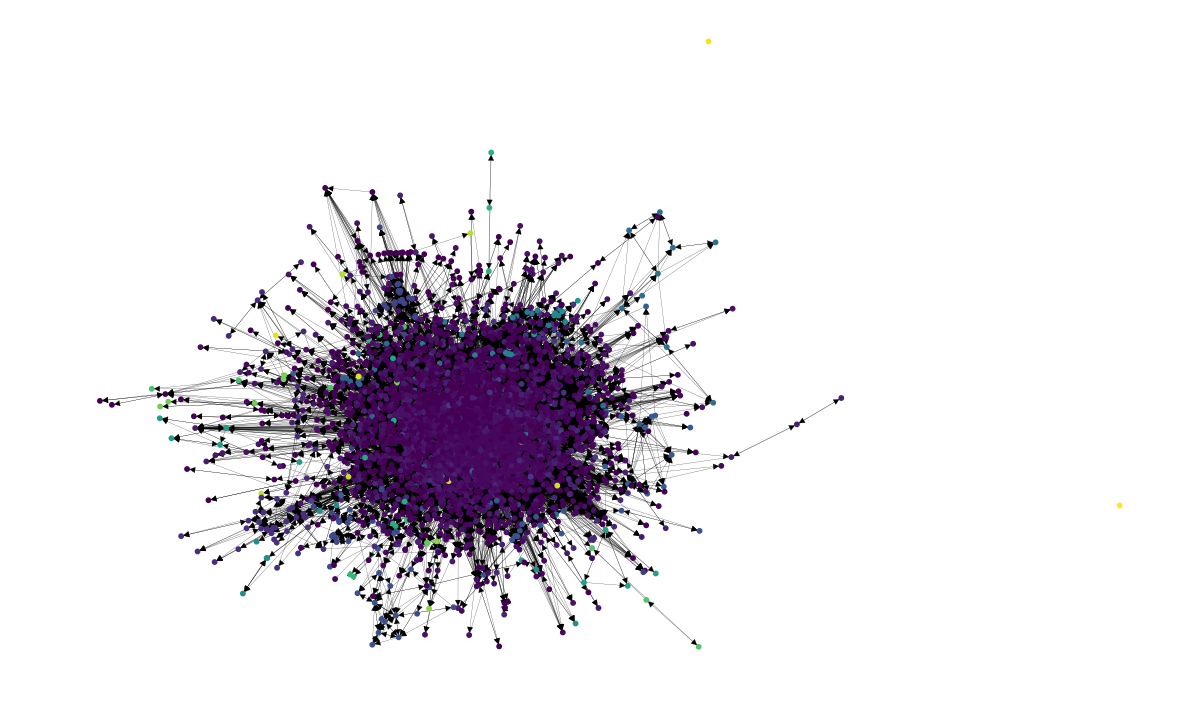

In [28]:
# Community detection
communities = list(greedy_modularity_communities(G_small_undirected))

# Plot the communities
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options["node_color"] = [0] * G_small.number_of_nodes()
for i, community in enumerate(communities):
    for node in community:
        plot_options["node_color"][list(G_small.nodes()).index(node)] = i
nx.draw_networkx(G_small, pos=pos, ax=ax, **plot_options)

In [29]:
# Compute the transitivity of the Graph
print("Transitivity of the Graph: ", nx.transitivity(G_small_undirected))

# Compute the total number of triangles
triangle_count = sum(nx.triangles(G_small_undirected, nodes=G_small_undirected.nodes()).values()) // 3
print("Triangle estimation: " + str(triangle_count))

Transitivity of the Graph:  0.11958014661854903
Triangle estimation: 307884


## Metrics on communities

In [30]:
# Compute the average clustering coefficient of the communities
average_clustering_coefficients = []
for community in communities:
    average_clustering_coefficients.append(nx.average_clustering(G_small_undirected.subgraph(community)))

# Compute the average degree of the communities
average_degrees = []
for community in communities:
    average_degrees.append(np.mean([d for n, d in G_small_undirected.degree(community)]))

# Compute the average shortest path length of the communities
average_shortest_path_lengths = []
for community in communities:
    average_shortest_path_lengths.append(nx.average_shortest_path_length(G_small_undirected.subgraph(community)))

# Compute the diameter of the communities
diameters = []
for community in communities:
    if nx.is_connected(G_small_undirected.subgraph(community)):
        diameters.append(nx.diameter(G_small_undirected.subgraph(community)))
    else:
        diameters.append("infinite")

# Compute the transitivity of the communities
transitivities = []
for community in communities:
    transitivities.append(nx.transitivity(G_small_undirected.subgraph(community)))


# Compute the average betweenness centrality of the communities
average_betweenness_centralities = []
for community in communities:
    average_betweenness_centralities.append(np.mean(list(nx.betweenness_centrality(G_small_undirected.subgraph(community)).values())))


# Compute the average closeness centrality of the communities
average_closeness_centralities = []
for community in communities:
    average_closeness_centralities.append(np.mean(list(nx.closeness_centrality(G_small_undirected.subgraph(community)).values())))


# Compute the average degree centrality of the communities
average_degree_centralities = []
for community in communities:
    average_degree_centralities.append(np.mean(list(nx.degree_centrality(G_small_undirected.subgraph(community)).values())))

In [31]:
# Define the data
data = {
    "Community": range(len(communities)),
    "Node":[len(community) for community in communities],
    "Edges": [G_small_undirected.subgraph(community).number_of_edges() for community in communities],
    "Average Clustering Coefficient": average_clustering_coefficients,
    "Average Degree": average_degrees,
    "Average Shortest Path Length": average_shortest_path_lengths,
    "Diameter": diameters,
    "Transitivity": transitivities,
    "Average Betweenness Centrality": average_betweenness_centralities,
    "Average Closeness Centrality": average_closeness_centralities,
    "Average Degree Centrality": average_degree_centralities
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame using tabulate for better formatting
print(tabulate(df, headers='keys', tablefmt='github'))


|    |   Community |   Node |   Edges |   Average Clustering Coefficient |   Average Degree |   Average Shortest Path Length |   Diameter |   Transitivity |   Average Betweenness Centrality |   Average Closeness Centrality |   Average Degree Centrality |
|----|-------------|--------|---------|----------------------------------|------------------|--------------------------------|------------|----------------|----------------------------------|--------------------------------|-----------------------------|
|  0 |           0 |   1667 |   11899 |                         0.360325 |         20.9124  |                        3.00067 |          7 |       0.127757 |                       0.0012016  |                       0.338476 |                  0.00856899 |
|  1 |           1 |   1403 |   21698 |                         0.391643 |         40.7904  |                        2.44389 |          6 |       0.177011 |                       0.00103061 |                       0.41594  |           

In [32]:
# Print the total number of communities
print("Number of Communities: ", len(communities))

# Print the number of nodes in each community
print("Number of Nodes in Each Community: ", [len(community) for community in communities])

# Print the number of edges in each community
print("Number of Edges in Each Community: ", [G_small_undirected.subgraph(community).number_of_edges() for community in communities])

Number of Communities:  46
Number of Nodes in Each Community:  [1667, 1403, 781, 197, 175, 79, 39, 27, 23, 22, 22, 16, 15, 14, 13, 12, 10, 9, 9, 7, 7, 6, 6, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1]
Number of Edges in Each Community:  [11899, 21698, 4019, 515, 467, 164, 108, 67, 44, 95, 36, 46, 29, 40, 44, 16, 25, 10, 22, 7, 21, 11, 7, 6, 9, 8, 4, 4, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0]


## Visualization

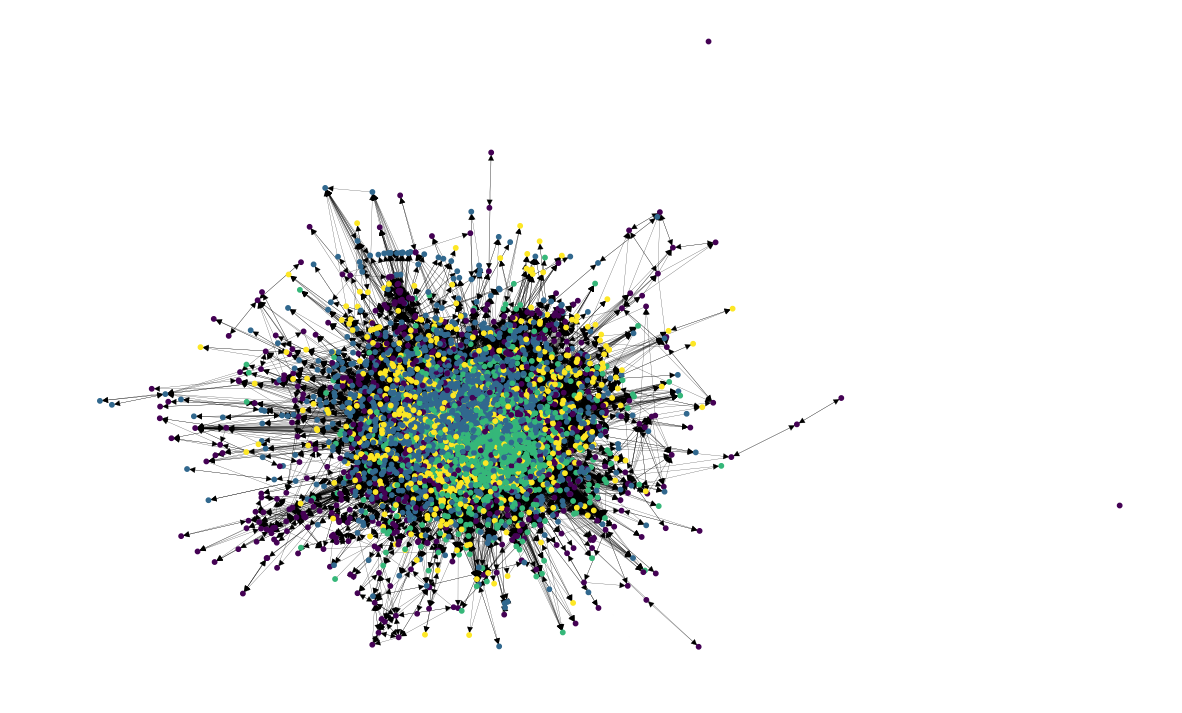

In [33]:
# Visualize the first, second and third community in one plot
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options["node_color"] = [0] * G_small.number_of_nodes()
for node in communities[0]:
    plot_options["node_color"][list(G_small.nodes()).index(node)] = 1
for node in communities[1]:
    plot_options["node_color"][list(G_small.nodes()).index(node)] = 2
for node in communities[2]:
    plot_options["node_color"][list(G_small.nodes()).index(node)] = 3
nx.draw_networkx(G_small, pos=pos, ax=ax, **plot_options)

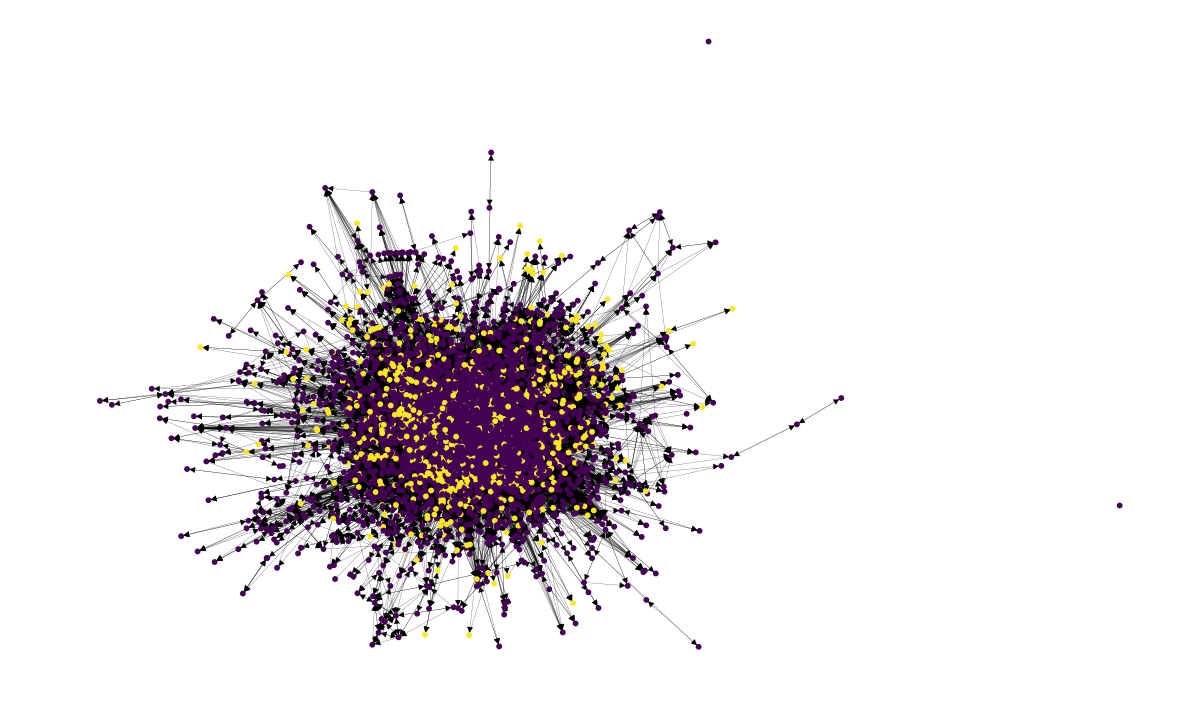

In [34]:
# Visualize the first community
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")

for community in communities[:3]:
    plot_options["node_color"] = [0] * G_small.number_of_nodes()
    for node in community:
        plot_options["node_color"][list(G_small.nodes()).index(node)] = 1

nx.draw_networkx(G_small, pos=pos, ax=ax, **plot_options)

In [35]:
subgraph = G_small.subgraph(communities[0])

# Find the degrees of all nodes in the subgraph
node_degrees = dict(subgraph.degree())

# Sort nodes by their degrees in descending order
sorted_nodes = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)

# Take the top three nodes
top_three_nodes = sorted_nodes[:3]

print("Top three nodes with the highest degrees within the community:")
for node, degree in top_three_nodes:
    print("Node:", node, "- Degree:", degree)

Top three nodes with the highest degrees within the community:
Node: gaming - Degree: 423
Node: games - Degree: 318
Node: techsupport - Degree: 313


In [36]:
subgraph = G_small.subgraph(communities[1])

# Find the degrees of all nodes in the subgraph
node_degrees = dict(subgraph.degree())

# Sort nodes by their degrees in descending order
sorted_nodes = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)

# Take the top three nodes
top_three_nodes = sorted_nodes[:3]

print("Top three nodes with the highest degrees within the community:")
for node, degree in top_three_nodes:
    print("Node:", node, "- Degree:", degree)

Top three nodes with the highest degrees within the community:
Node: askreddit - Degree: 872
Node: subredditdrama - Degree: 669
Node: conspiracy - Degree: 374


In [37]:
subgraph = G_small.subgraph(communities[2])

# Find the degrees of all nodes in the subgraph
node_degrees = dict(subgraph.degree())

# Sort nodes by their degrees in descending order
sorted_nodes = sorted(node_degrees.items(), key=lambda x: x[1], reverse=True)

# Take the top three nodes
top_three_nodes = sorted_nodes[:3]

print("Top three nodes with the highest degrees within the community:")
for node, degree in top_three_nodes:
    print("Node:", node, "- Degree:", degree)

Top three nodes with the highest degrees within the community:
Node: iama - Degree: 255
Node: nfl - Degree: 142
Node: soccer - Degree: 115
